# Aggregating and Summarizing Data

We've now seen that we can use dataframes as a means of organizing, cleaning, and visually exploring data. But typically, we need to back up our conclusions with numbers, which means finding ways to calculate statistics of interest for groups.

The pandas dataframe, like data objects in several other languages, has facilities to make many common data analysis tasks easy. How? By the recognition that a large number of tasks can be placed into a simple, three-step framework:

1. **Split**: Split the data into groups according to the value of some variable(s)
1. **Apply**: Perform some operation on each group separately
1. **Combine**: Combine the results for each group back into some sensible structure (usually another dataframe)

This framework has proven to be incredibly for two main reasons:

- It is flexible enough to accommodate a huge percentage of routine data analysis tasks (and so is worthwhile for programmers to implement)
- It translates well to computing clusters, where each apply step can be performed in parallel on a separate machine (in this context, it is usually known as MapReduce, with Map=apply and Reduce=combine)

In this lesson, we'll see how to apply this method to our data.

In [1]:
# first, load up some necessities
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/long_data_cleaned.csv')
data.head(20)

,Unnamed: 0,dilution,analyte,fi-bkgd,fi-bkgd-neg,cv,participant_id,visit_code,visit_date,sample_type,buffer,bead_number
0,0,50,p24,474.8,454.800000,0.0372,URN2,0,10/14/1899,PLA,PBS,19
1,1,50,gp41,470.8,452.800000,0.1387,URN2,0,10/14/1899,PLA,PBS,44
2,2,50,Con 6 gp120/B,52.5,44.500000,0.1183,URN2,0,10/14/1899,PLA,PBS,72
3,3,50,B.con.env03 140 CF,55.5,46.500000,0.1709,URN2,0,10/14/1899,PLA,PBS,65
4,4,50,Blank,29.0,NaN,0.0527,URN2,0,10/14/1899,PLA,PBS,53
5,5,50,Con S gp140 CFI,82.0,62.000000,0.1799,URN2,0,10/14/1899,PLA,PBS,3
6,6,50,p31,474.4,455.400000,0.0885,URN2,0,10/14/1899,PLA,PBS,50
7,7,50,p66 (RT),69.4,50.400000,0.0527,URN2,0,10/14/1899,PLA,PBS,42
8,8,50,MulVgp70_His6,205.4,NaN,0.0861,URN2,0,10/14/1899,PLA,PBS,49
9,9,50,gp70_B.CaseA_V1_V2,40.5,-64.766667,0.0615,URN2,0,10/14/1899,PLA,PBS,12


In [3]:
data.describe()

,Unnamed: 0,dilution,fi-bkgd,fi-bkgd-neg,cv,visit_code,bead_number
count,1760.000000,1760,1760.000000,1408.000000,1760.000000,1760.000000,1760.00000
mean,880.236364,50,12248.448580,15214.542401,0.070186,11.363636,40.90000
std,508.548976,0,17373.550795,18146.601626,0.107802,7.360114,21.46513
min,0.000000,50,-52.500000,-559.400000,0.000000,0.000000,3.00000
25%,439.750000,50,48.500000,58.650000,0.007200,5.000000,19.00000
50%,880.500000,50,407.200000,2441.383333,0.035850,11.000000,46.50000
75%,1320.250000,50,27918.675000,40242.208333,0.087325,17.250000,53.00000
max,1760.000000,50,42992.500000,42986.200000,1.308200,27.000000,72.00000


## Example 1: Analyte by participant

Let's say we want to aggregate across visits, calculating mean levels of fi-bkgd for each participant. How would you do this with Excel? With pandas, it's easy:

In [4]:
fi_means = data.groupby(['participant_id', 'analyte'])['fi-bkgd'].mean()
fi_means

participant_id  analyte           
PL1             B.con.env03 140 CF     5248.545833
                Blank                    34.383333
                Con 6 gp120/B          2493.429167
                Con S gp140 CFI        5650.304167
                MulVgp70_His6            76.220833
                gp41                  11882.704167
                gp70_B.CaseA_V1_V2     2540.566667
                p24                   14297.562500
                p31                    1483.820833
                p66 (RT)               5508.983333
PL2             B.con.env03 140 CF    20369.926000
                Blank                    20.678000
                Con 6 gp120/B          6701.500000
                Con S gp140 CFI       20645.622000
                MulVgp70_His6           136.448000
                gp41                  29253.188000
                gp70_B.CaseA_V1_V2     1104.840000
                p24                   14727.488000
                p31                    9969.960

### What did we do here?:

- Grouped the data by distinct (participant, analyte) pairs using `groupby`. This is the split step.
- Took the `fi-bkgd` column from the result using the "get item" bracket notation
- Calculated the mean using the `.mean` method. This is the apply step.
- The combine step is magically handled by pandas.

### Changing axes

What we might want, though, is something like a real table, not a long list. The result of our data crunching is a single column of numbers, when what we probably wanted was a data frame. In fact, this is a pandas Series, and if we look at its index

In [5]:
print fi_means.index

MultiIndex(levels=[[u'PL1', u'PL2', u'SAL2', u'URN2'], [u'B.con.env03 140 CF', u'Blank', u'Con 6 gp120/B', u'Con S gp140 CFI', u'MulVgp70_His6', u'gp41', u'gp70_B.CaseA_V1_V2', u'p24', u'p31', u'p66 (RT)']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[u'participant_id', u'analyte'])


we can see that the index is by pairs of (participant, analyte). Thankfully, pandas will let us turn this complicated "multi-index"/hierarchical index into a regular row, column form via the `unstack` command:

In [6]:
fi_means.unstack()

analyte,B.con.env03 140 CF,Blank,Con 6 gp120/B,Con S gp140 CFI,MulVgp70_His6,gp41,gp70_B.CaseA_V1_V2,p24,p31,p66 (RT)
participant_id,,,,,,,,,,
PL1,5248.545833,34.383333,2493.429167,5650.304167,76.220833,11882.704167,2540.566667,14297.562500,1483.820833,5508.983333
PL2,20369.926000,20.678000,6701.500000,20645.622000,136.448000,29253.188000,1104.840000,14727.488000,9969.960000,17681.024000
SAL2,18320.130769,113.715385,10113.767308,21909.851923,139.051923,26597.051923,5170.490385,34440.390385,20199.990385,23756.371154
URN2,18649.212000,71.030000,6207.658000,11790.346000,103.590000,23632.688000,33.986000,27504.494000,11745.416000,19981.122000


See what happened? The `unstack` method made the innermost index level the column label. But in fact, we could have specified which part of the index became the column:

In [7]:
fi_means.unstack(level=0)  # remember, Python starts counting from 0, not 1

participant_id,PL1,PL2,SAL2,URN2
analyte,,,,
B.con.env03 140 CF,5248.545833,20369.926,18320.130769,18649.212
Blank,34.383333,20.678,113.715385,71.030
Con 6 gp120/B,2493.429167,6701.500,10113.767308,6207.658
Con S gp140 CFI,5650.304167,20645.622,21909.851923,11790.346
MulVgp70_His6,76.220833,136.448,139.051923,103.590
gp41,11882.704167,29253.188,26597.051923,23632.688
gp70_B.CaseA_V1_V2,2540.566667,1104.840,5170.490385,33.986
p24,14297.562500,14727.488,34440.390385,27504.494
p31,1483.820833,9969.960,20199.990385,11745.416


In [8]:
fi_means.unstack(level=1)  # this is equivalent to what we did initially

analyte,B.con.env03 140 CF,Blank,Con 6 gp120/B,Con S gp140 CFI,MulVgp70_His6,gp41,gp70_B.CaseA_V1_V2,p24,p31,p66 (RT)
participant_id,,,,,,,,,,
PL1,5248.545833,34.383333,2493.429167,5650.304167,76.220833,11882.704167,2540.566667,14297.562500,1483.820833,5508.983333
PL2,20369.926000,20.678000,6701.500000,20645.622000,136.448000,29253.188000,1104.840000,14727.488000,9969.960000,17681.024000
SAL2,18320.130769,113.715385,10113.767308,21909.851923,139.051923,26597.051923,5170.490385,34440.390385,20199.990385,23756.371154
URN2,18649.212000,71.030000,6207.658000,11790.346000,103.590000,23632.688000,33.986000,27504.494000,11745.416000,19981.122000


Note that now we have a table (which table is up to us), and that it can easily be saved to csv for inclusion in a paper or to share with colleagues.

### And we can plot!

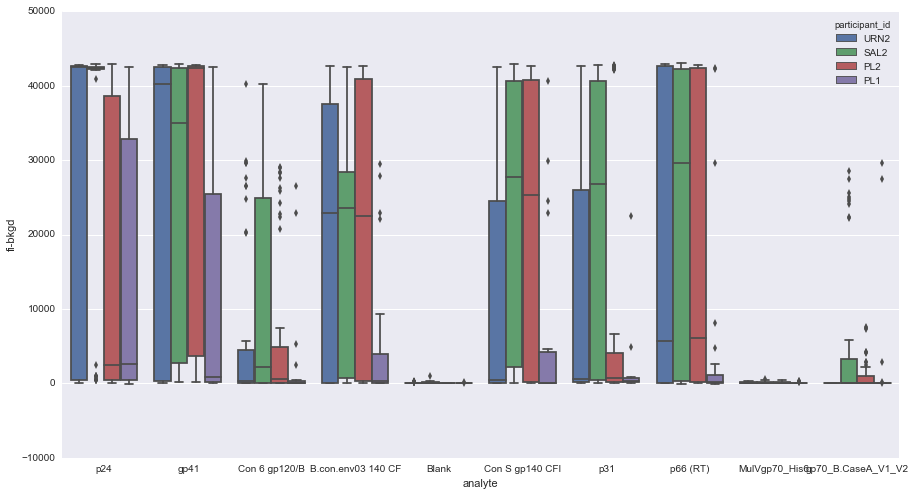

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='analyte', y='fi-bkgd', hue='participant_id', data=data)
pass

## Exercise: 

There are a lot of outliers in the dataset. Instead of the mean, let's get a median, and let's look at differences between `fi-bkgd` and `fi-bkgd-neg`. Do this:

1. Create a new dataframe column that captures the difference between `fi-bkgd` and `fi-bkgd-neg`. Remember that we can create a new column with code like
```python
data[<new column name>] = <some calculation>
```
where the bracketed portions are to be replaced (including the brackets themselves).

1. Repeat the same analysis as above, this time on the difference, column, but use the median, which is less sensitive to outliers.

1. Use `unstack` to get a table with participants as columns.

In [10]:
data['fi_diff'] = data['fi-bkgd'] - data['fi-bkgd-neg']
fi_meds = data.groupby(['participant_id', 'analyte'])['fi_diff'].median()
fi_meds.unstack(level=0)

participant_id,PL1,PL2,SAL2,URN2
analyte,,,,
B.con.env03 140 CF,13.927778,11.300000,34.900000,38.500000
Blank,NaN,NaN,NaN,NaN
Con 6 gp120/B,13.316667,14.000000,40.100000,35.800000
Con S gp140 CFI,17.266667,18.127778,32.050000,40.327778
MulVgp70_His6,NaN,NaN,NaN,NaN
gp41,13.516667,17.877778,35.050000,41.077778
gp70_B.CaseA_V1_V2,54.150000,26.850000,56.527778,70.933333
p24,13.300000,14.877778,40.050000,29.777778
p31,23.627778,16.627778,40.600000,39.077778


## Example 2: Participants over time

Sometimes, we just want to reorganize our table so we can ask a different kind of question. For instance, what if we want to see what's happening in our data over time? That is, we might want to index our data by date, which can be done using the `set_index` method:

In [11]:
data.set_index('visit_date')

,Unnamed: 0,dilution,analyte,fi-bkgd,fi-bkgd-neg,cv,participant_id,visit_code,sample_type,buffer,bead_number,fi_diff
visit_date,,,,,,,,,,,,
10/14/1899,0,50,p24,474.8,454.800000,0.0372,URN2,0,PLA,PBS,19,20.000000
10/14/1899,1,50,gp41,470.8,452.800000,0.1387,URN2,0,PLA,PBS,44,18.000000
10/14/1899,2,50,Con 6 gp120/B,52.5,44.500000,0.1183,URN2,0,PLA,PBS,72,8.000000
10/14/1899,3,50,B.con.env03 140 CF,55.5,46.500000,0.1709,URN2,0,PLA,PBS,65,9.000000
10/14/1899,4,50,Blank,29.0,NaN,0.0527,URN2,0,PLA,PBS,53,NaN
10/14/1899,5,50,Con S gp140 CFI,82.0,62.000000,0.1799,URN2,0,PLA,PBS,3,20.000000
10/14/1899,6,50,p31,474.4,455.400000,0.0885,URN2,0,PLA,PBS,50,19.000000
10/14/1899,7,50,p66 (RT),69.4,50.400000,0.0527,URN2,0,PLA,PBS,42,19.000000
10/14/1899,8,50,MulVgp70_His6,205.4,NaN,0.0861,URN2,0,PLA,PBS,49,NaN


And what if we want a combined index of date and participant? We can do it this way:

In [12]:
data.set_index(['visit_date', 'participant_id'])

Unnamed: 0  dilution             analyte  fi-bkgd  \
visit_date  participant_id                                                      
 10/14/1899 URN2                     0        50                 p24    474.8   
            URN2                     1        50                gp41    470.8   
            URN2                     2        50       Con 6 gp120/B     52.5   
            URN2                     3        50  B.con.env03 140 CF     55.5   
            URN2                     4        50               Blank     29.0   
            URN2                     5        50     Con S gp140 CFI     82.0   
            URN2                     6        50                 p31    474.4   
            URN2                     7        50            p66 (RT)     69.4   
            URN2                     8        50       MulVgp70_His6    205.4   
            URN2                     9        50  gp70_B.CaseA_V1_V2     40.5   
            URN2                    10        50                 p24     88.4   
            URN2                    11        50                gp41    227.4   
            URN2                    12        50       Con 6 gp120/B     44.4   
            URN2                    13        50  B.con.env03 140 CF     48.5   
            URN2                    14        50               Blank      4.8   
            URN2                    15        50     Con S gp140 CFI     22.8   
            URN2                    16        50                 p31    227.4   
            URN2                    17        50            p66 (RT)     45.8   
            URN2                    18        50       MulVgp70_His6     20.0   
            URN2                    19        50  gp70_B.CaseA_V1_V2     22.5   
 01/04/1901 URN2                    20        50                 p24  42686.8   
            URN2                    21        50                gp41  42599.8   
            URN2                    22        50       Con 6 gp120/B    272.8   
            URN2                    23        50  B.con.env03 140 CF  22762.0   
            URN2                    24        50               Blank     54.0   
            URN2                    25        50     Con S gp140 CFI   7776.4   
            URN2                    26        50                 p31    494.4   
            URN2                    27        50            p66 (RT)    502.4   
            URN2                    28        50       MulVgp70_His6     89.5   
            URN2                    29        50  gp70_B.CaseA_V1_V2     47.5   
...                                ...       ...                 ...      ...   
 07/07/1901 PL1                   1731        50                 p24  29689.0   
            PL1                   1732        50                gp41  22504.5   
            PL1                   1733        50       Con 6 gp120/B   2478.0   
            PL1                   1734        50  B.con.env03 140 CF    884.8   
            PL1                   1735        50               Blank     22.4   
            PL1                   1736        50     Con S gp140 CFI  22952.4   
            PL1                   1737        50                 p31    202.4   
            PL1                   1738        50            p66 (RT)   2540.0   
            PL1                   1739        50       MulVgp70_His6     24.0   
            PL1                   1740        50  gp70_B.CaseA_V1_V2    245.5   
 03/24/1901 PL1                   1741        50                 p24    564.4   
            PL1                   1742        50                gp41    268.5   
            PL1                   1743        50       Con 6 gp120/B     67.4   
            PL1                   1744        50  B.con.env03 140 CF     57.0   
            PL1                   1745        50               Blank     24.4   
            PL1                   1746        50     Con S gp140 CFI     46.0   
            PL1                   1747        50           

### Exercise

Note that our first participant has multiple readings for some analytes. Let's make a separate dataset where we do a few things:

- Keep only the information about date, participant, analyte, and fi_diff
- Where there are multiple readings for a given participant on a given day with a given analyte, take the mean
- Use unstacking to get a table with `analyte` as column

In [13]:
data_sub = data.groupby(['visit_date', 'participant_id', 'analyte'])['fi_diff'].mean().unstack()

In [14]:
# now unstack analyte
data_sub

,analyte,B.con.env03 140 CF,Blank,Con 6 gp120/B,Con S gp140 CFI,MulVgp70_His6,gp41,gp70_B.CaseA_V1_V2,p24,p31,p66 (RT)
visit_date,participant_id,,,,,,,,,,
01/02/1903,URN2,63.127778,NaN,72.627778,22.627778,NaN,73.177778,169.755556,63.077778,63.177778,73.127778
01/04/1901,URN2,32.250000,NaN,26.750000,25.800000,NaN,36.800000,75.950000,26.250000,36.800000,31.750000
01/06/1900,PL2,14.500000,NaN,15.050000,9.100000,NaN,19.500000,138.333333,15.000000,13.950000,14.450000
01/10/1901,URN2,135.250000,NaN,-18.750000,25.200000,NaN,80.750000,55.066667,81.200000,29.750000,20.750000
01/11/1900,PL2,8.550000,NaN,14.500000,15.000000,NaN,63.500000,142.583333,8.500000,13.950000,13.500000
01/14/1900,PL2,20.377778,NaN,9.377778,9.377778,NaN,10.377778,132.150000,13.927778,14.377778,64.927778
01/16/1902,URN2,59.677778,NaN,59.627778,60.127778,NaN,64.627778,147.822222,64.577778,9.627778,65.127778
01/17/1901,URN2,28.700000,NaN,28.800000,34.300000,NaN,82.750000,68.700000,29.250000,33.750000,38.750000
01/18/1900,PL2,12.300000,NaN,11.750000,12.200000,NaN,17.300000,125.400000,17.300000,12.300000,12.250000


Now imagine that we'd like to plot these data as a time series for a given participant. Currently, participant is part of the index, but we can move it from rows to columns via unstack:

In [15]:
data_by_time = data_sub.unstack()  # remember, this unstacks the innermost indexing variable
data_by_time.head()

analyte        B.con.env03 140 CF                         Blank                \
participant_id                PL1    PL2 SAL2        URN2   PL1 PL2 SAL2 URN2   
visit_date                                                                      
 01/02/1903                   NaN    NaN  NaN   63.127778   NaN NaN  NaN  NaN   
 01/04/1901                   NaN    NaN  NaN   32.250000   NaN NaN  NaN  NaN   
 01/06/1900                   NaN  14.50  NaN         NaN   NaN NaN  NaN  NaN   
 01/10/1901                   NaN    NaN  NaN  135.250000   NaN NaN  NaN  NaN   
 01/11/1900                   NaN   8.55  NaN         NaN   NaN NaN  NaN  NaN   

analyte        Con 6 gp120/B           ...      p24            p31         \
participant_id           PL1    PL2    ...     SAL2       URN2 PL1    PL2   
visit_date                             ...                                  
 01/02/1903              NaN    NaN    ...      NaN  63.077778 NaN    NaN   
 01/04/1901              NaN    NaN    ...      NaN  26.250000 NaN    NaN   
 01/06/1900              NaN  15.05    ...      NaN        NaN NaN  13.95   
 01/10/1901              NaN    NaN    ...      NaN  81.200000 NaN    NaN   
 01/11/1900              NaN  14.50    ...      NaN        NaN NaN  13.95   

analyte                        p66 (RT)                         
participant_id SAL2       URN2      PL1    PL2 SAL2       URN2  
visit_date                                                      
 01/02/1903     NaN  63.177778      NaN    NaN  NaN  73.127778  
 01/04/1901     NaN  36.800000      NaN    NaN  NaN  31.750000  
 01/06/1900     NaN        NaN      NaN  14.45  NaN        NaN  
 01/10/1901     NaN  29.750000      NaN    NaN  NaN  20.750000  
 01/11/1900     NaN        NaN      NaN  13.50  NaN        NaN  

[5 rows x 40 columns]

Notice that this unstacking has traded a hierarchical row index for a hierarchical column index!

This is very useful. If, for instance, we do

In [16]:
data_by_time['p24'].head()

participant_id,PL1,PL2,SAL2,URN2
visit_date,,,,
01/02/1903,NaN,NaN,NaN,63.077778
01/04/1901,NaN,NaN,NaN,26.250000
01/06/1900,NaN,15.0,NaN,NaN
01/10/1901,NaN,NaN,NaN,81.200000
01/11/1900,NaN,8.5,NaN,NaN


we get the time series of analyte levels for `p24` for each subject. That is, we've taken a slice into the top level of the multi-index. And because pandas treats each column as a separate variable, and understands dates, this is easy to plot:

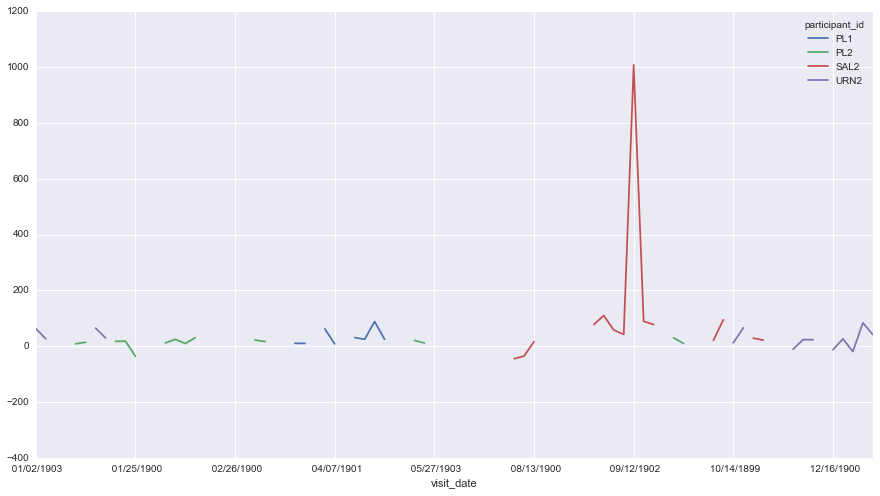

In [17]:
data_by_time['p24'].plot(figsize=(15, 8));

Okay, that's sort of ugly. This is because subjects came in on different dates, and so there's lots of missing data. We can get around this by interpolating:

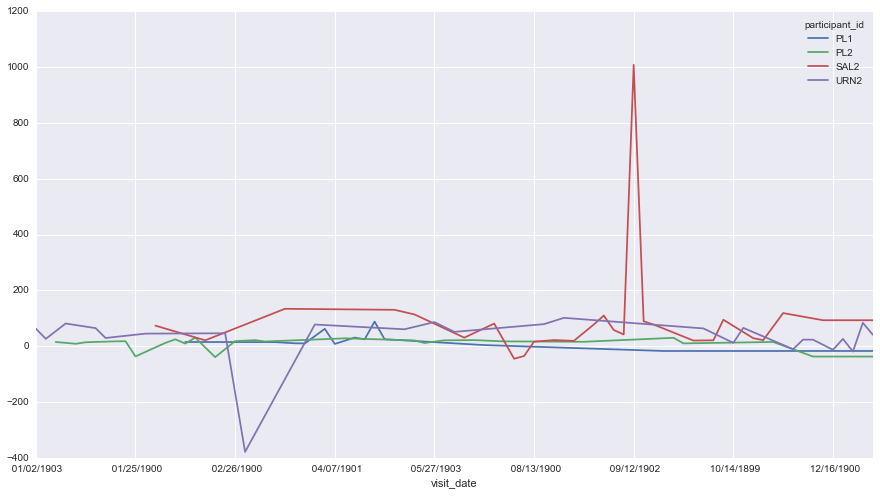

In [18]:
data_by_time['p24'].interpolate().plot(figsize=(15, 8));

Still not great, but it gives us a better sense.

Nonetheless, what we might want is to plot by subject, though to do this, it seems like we'd have to go into each analyte and get a particular subject's data by hand. 

But fear not! Pandas easily lets us swap the levels of a multiindex:

In [19]:
# swap levels 0 and 1 of multi-index on axis 1
data_by_time_swapped = data_by_time.swaplevel(0, 1, axis=1)  # axis 0 is columns, 1 is rows

data_by_time_swapped.head()

participant_id,PL1,PL2,SAL2,URN2,PL1,PL2,SAL2,URN2,PL1,PL2,...,SAL2,URN2,PL1,PL2,SAL2,URN2,PL1,PL2,SAL2,URN2
analyte,B.con.env03 140 CF,B.con.env03 140 CF,B.con.env03 140 CF,B.con.env03 140 CF,Blank,Blank,Blank,Blank,Con 6 gp120/B,Con 6 gp120/B,...,p24,p24,p31,p31,p31,p31,p66 (RT),p66 (RT),p66 (RT),p66 (RT)
visit_date,,,,,,,,,,,,,,,,,,,,,
01/02/1903,NaN,NaN,NaN,63.127778,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.077778,NaN,NaN,NaN,63.177778,NaN,NaN,NaN,73.127778
01/04/1901,NaN,NaN,NaN,32.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.250000,NaN,NaN,NaN,36.800000,NaN,NaN,NaN,31.750000
01/06/1900,NaN,14.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.05,...,NaN,NaN,NaN,13.95,NaN,NaN,NaN,14.45,NaN,NaN
01/10/1901,NaN,NaN,NaN,135.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,81.200000,NaN,NaN,NaN,29.750000,NaN,NaN,NaN,20.750000
01/11/1900,NaN,8.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.50,...,NaN,NaN,NaN,13.95,NaN,NaN,NaN,13.50,NaN,NaN


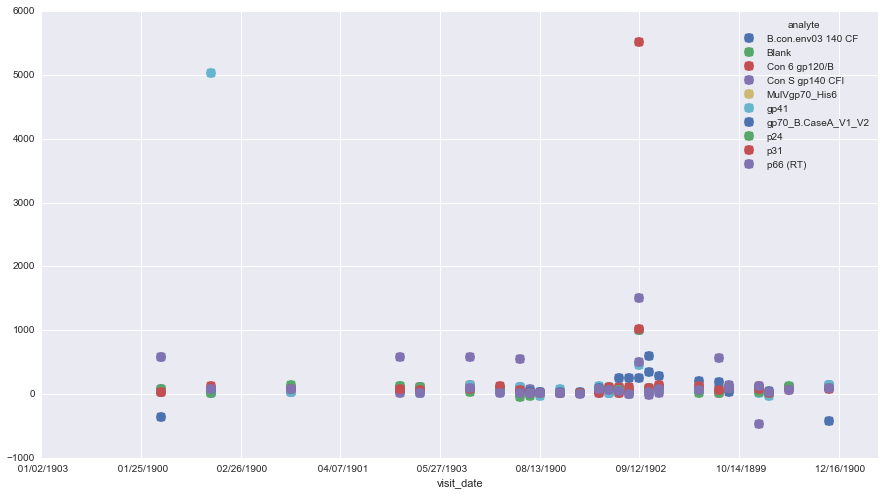

In [20]:
data_by_time_swapped['SAL2'].plot(figsize=(15, 8), linestyle='none', marker='.', markersize=20);

### Exercise:

- How would you aggregate the data? Work in groups of two and with the help of Google and the instructors, execute this analysis.

- How would you plot the data to graphically demonstrate your analysis?

## Final note

Pandas is a large and complex package, with Series, DataFrames, PivotTables, hierarchical indices, and lots of other complicated objects. The best way to learn is by doing, but for a more structured interpretation, consult the [documentation](http://pandas.pydata.org/pandas-docs/stable/) and [Wes McKinney's book](http://shop.oreilly.com/product/0636920023784.do). (Wes is the creator of Pandas; the book is a few years old now, and the project has evolved rapidly in the interim, but it's still a good introduction to "the Pandas way" of thinking about data analysis.